In [94]:
import csv
import pandas as pd
import numpy as np
import seaborn
from seaborn import pairplot
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [95]:
df = pd.read_csv('cleaner_data.csv')
df.head()


,Unnamed: 0,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,def_pass_epa_home,def_rush_epa_home,def_epa_away,def_pass_epa_away,def_rush_epa_away
0,1,2011_01_ATL_CHI,2011,1,CHI,Jay Cutler,-0.055269,ATL,Matt Ryan,-0.262554,-0.262554,-0.290874,-0.166269,-0.055269,0.014545,-0.150940
1,2,2011_01_BUF_KC,2011,1,KC,Matt Cassel,-0.372663,BUF,Ryan Fitzpatrick,0.223898,0.223898,0.443865,0.067607,-0.372663,-0.444717,-0.220548
2,3,2011_01_CAR_ARI,2011,1,ARI,Kevin Kolb,0.132567,CAR,Cam Newton,0.125934,0.125934,0.348553,-0.212117,0.132567,0.395432,-0.198872
3,4,2011_01_CIN_CLE,2011,1,CLE,Colt McCoy,-0.150630,CIN,Andy Dalton,0.054779,0.054779,-0.018311,0.127870,-0.150630,-0.214656,-0.043065
4,5,2011_01_DAL_NYJ,2011,1,NYJ,Mark Sanchez,-0.071235,DAL,Tony Romo,0.050997,0.050997,0.200578,-0.188334,-0.071235,-0.027524,-0.202369


In [96]:
data = df[['game_id','season','week','home_team','home_qb_name','home_off_epa','away_team','away_qb_name','away_off_epa','def_epa_home','def_epa_away']]

In [110]:
games_df = pd.read_csv('/Users/tcjurgens/Documents/Data_Final_Project/NFL-Analytics-Project/lines_data/betting_info.csv')
games_df.head()

,Unnamed: 0,game_id,season,game_type,week,matchup,home_team,away_team,home_score,away_score,...,weather,ATS_win,ATS_loss,ATS_push,over,under,push,div_game,home_moneyline,away_moneyline
0,1,2011_01_NO_GB,2011,REG,1,GB v NO,GB,NO,42.0,34.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0,-250.0,222.0
1,2,2011_01_PIT_BAL,2011,REG,1,BAL v PIT,BAL,PIT,35.0,7.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1,-125.0,113.0
2,3,2011_01_ATL_CHI,2011,REG,1,CHI v ATL,CHI,ATL,30.0,12.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0,105.0,-116.0
3,4,2011_01_CIN_CLE,2011,REG,1,CLE v CIN,CLE,CIN,17.0,27.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1,-310.0,273.0
4,5,2011_01_IND_HOU,2011,REG,1,HOU v IND,HOU,IND,34.0,7.0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1,-430.0,369.0


In [111]:
schedule = games_df[['game_id', 'season', 'week', 'home_team', 'away_team', 'home_score', 'away_score','spread_line','total_line', 'total']]\
.drop_duplicates().reset_index(drop=True)\
.assign(home_team_win = lambda x: (x.home_score > x.away_score).astype(int))
schedule.head()

,game_id,season,week,home_team,away_team,home_score,away_score,spread_line,total_line,total,home_team_win
0,2011_01_NO_GB,2011,1,GB,NO,42.0,34.0,-4.5,47.5,76.0,1
1,2011_01_PIT_BAL,2011,1,BAL,PIT,35.0,7.0,-1.0,37.0,42.0,1
2,2011_01_ATL_CHI,2011,1,CHI,ATL,30.0,12.0,1.0,40.5,42.0,1
3,2011_01_CIN_CLE,2011,1,CLE,CIN,17.0,27.0,-6.5,36.5,44.0,0
4,2011_01_IND_HOU,2011,1,HOU,IND,34.0,7.0,-9.0,44.0,41.0,1


In [112]:
test_df = data.merge(schedule, on =['game_id','season','week','home_team','away_team'])
test_df.head()

,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,def_epa_away,home_score,away_score,spread_line,total_line,total,home_team_win
0,2011_01_ATL_CHI,2011,1,CHI,Jay Cutler,-0.055269,ATL,Matt Ryan,-0.262554,-0.262554,-0.055269,30.0,12.0,1.0,40.5,42.0,1
1,2011_01_BUF_KC,2011,1,KC,Matt Cassel,-0.372663,BUF,Ryan Fitzpatrick,0.223898,0.223898,-0.372663,7.0,41.0,-3.5,38.5,48.0,0
2,2011_01_CAR_ARI,2011,1,ARI,Kevin Kolb,0.132567,CAR,Cam Newton,0.125934,0.125934,0.132567,28.0,21.0,-6.5,37.5,49.0,1
3,2011_01_CIN_CLE,2011,1,CLE,Colt McCoy,-0.150630,CIN,Andy Dalton,0.054779,0.054779,-0.150630,17.0,27.0,-6.5,36.5,44.0,0
4,2011_01_DAL_NYJ,2011,1,NYJ,Mark Sanchez,-0.071235,DAL,Tony Romo,0.050997,0.050997,-0.071235,27.0,24.0,-6.5,40.5,51.0,1


shift epas / average epas

In [113]:
test_df['home_qb_epa_shifted'] = test_df.groupby('home_qb_name')['home_off_epa'].shift()
test_df['away_qb_epa_shifted'] = test_df.groupby('away_qb_name')['away_off_epa'].shift()
test_df['home_def_shifted'] = test_df.groupby('home_team')['def_epa_home'].shift()
test_df['away_def_shifted'] = test_df.groupby('away_team')['def_epa_away'].shift()

test_df.head()


,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,...,home_score,away_score,spread_line,total_line,total,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted
0,2011_01_ATL_CHI,2011,1,CHI,Jay Cutler,-0.055269,ATL,Matt Ryan,-0.262554,-0.262554,...,30.0,12.0,1.0,40.5,42.0,1,NaN,NaN,NaN,NaN
1,2011_01_BUF_KC,2011,1,KC,Matt Cassel,-0.372663,BUF,Ryan Fitzpatrick,0.223898,0.223898,...,7.0,41.0,-3.5,38.5,48.0,0,NaN,NaN,NaN,NaN
2,2011_01_CAR_ARI,2011,1,ARI,Kevin Kolb,0.132567,CAR,Cam Newton,0.125934,0.125934,...,28.0,21.0,-6.5,37.5,49.0,1,NaN,NaN,NaN,NaN
3,2011_01_CIN_CLE,2011,1,CLE,Colt McCoy,-0.150630,CIN,Andy Dalton,0.054779,0.054779,...,17.0,27.0,-6.5,36.5,44.0,0,NaN,NaN,NaN,NaN
4,2011_01_DAL_NYJ,2011,1,NYJ,Mark Sanchez,-0.071235,DAL,Tony Romo,0.050997,0.050997,...,27.0,24.0,-6.5,40.5,51.0,1,NaN,NaN,NaN,NaN


In [114]:
test_df['home_qb_ewa'] = test_df.groupby('home_qb_name')['home_qb_epa_shifted'].transform(lambda x: x.ewm(min_periods=1, span=5).mean())
test_df['away_qb_ewa'] = test_df.groupby('away_qb_name')['away_qb_epa_shifted'].transform(lambda x: x.ewm(min_periods=1, span=5).mean())
test_df['home_def_ewa'] = test_df.groupby('home_team')['home_def_shifted'].transform(lambda x: x.ewm(min_periods=1, span=5).mean())
test_df['away_def_ewa'] = test_df.groupby('away_team')['away_def_shifted'].transform(lambda x: x.ewm(min_periods=1, span=5).mean())
test_df


,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,...,total,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted,home_qb_ewa,away_qb_ewa,home_def_ewa,away_def_ewa
0,2011_01_ATL_CHI,2011,1,CHI,Jay Cutler,-0.055269,ATL,Matt Ryan,-0.262554,-0.262554,...,42.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011_01_BUF_KC,2011,1,KC,Matt Cassel,-0.372663,BUF,Ryan Fitzpatrick,0.223898,0.223898,...,48.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011_01_CAR_ARI,2011,1,ARI,Kevin Kolb,0.132567,CAR,Cam Newton,0.125934,0.125934,...,49.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011_01_CIN_CLE,2011,1,CLE,Colt McCoy,-0.150630,CIN,Andy Dalton,0.054779,0.054779,...,44.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011_01_DAL_NYJ,2011,1,NYJ,Mark Sanchez,-0.071235,DAL,Tony Romo,0.050997,0.050997,...,51.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2021_10_NO_TEN,2021,10,TEN,Ryan Tannehill,-0.066429,NO,Trevor Siemian,0.111866,0.111866,...,NaN,0,0.189013,0.217527,-0.100877,-0.122105,0.107299,-0.118052,0.036425,-0.157979
2819,2021_10_PHI_DEN,2021,10,DEN,Teddy Bridgewater,-0.260955,PHI,Jalen Hurts,0.134323,0.134323,...,NaN,0,0.078866,0.233459,-0.016824,-0.405132,-0.040730,0.040595,0.057669,-0.118038
2820,2021_10_SEA_GB,2021,10,GB,Aaron Rodgers,0.064245,SEA,Russell Wilson,-0.303277,-0.303277,...,NaN,0,0.093420,-0.069162,-0.104424,0.000655,0.141187,0.040521,-0.059460,0.043662
2821,2021_10_TB_WAS,2021,10,WAS,Taylor Heinicke,0.041977,TB,Tom Brady,-0.018615,-0.018615,...,NaN,0,-0.168297,-0.030617,0.126235,0.046230,-0.094533,0.114497,0.104372,0.003492


In [115]:
test_df = test_df.fillna(test_df.mean())
test_df

,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,...,total,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted,home_qb_ewa,away_qb_ewa,home_def_ewa,away_def_ewa
0,2011_01_ATL_CHI,2011,1,CHI,Jay Cutler,-0.055269,ATL,Matt Ryan,-0.262554,-0.262554,...,42.000000,1,-0.001205,0.006443,-0.000552,-0.007638,-0.000606,0.006756,-0.001536,-0.007881
1,2011_01_BUF_KC,2011,1,KC,Matt Cassel,-0.372663,BUF,Ryan Fitzpatrick,0.223898,0.223898,...,48.000000,0,-0.001205,0.006443,-0.000552,-0.007638,-0.000606,0.006756,-0.001536,-0.007881
2,2011_01_CAR_ARI,2011,1,ARI,Kevin Kolb,0.132567,CAR,Cam Newton,0.125934,0.125934,...,49.000000,1,-0.001205,0.006443,-0.000552,-0.007638,-0.000606,0.006756,-0.001536,-0.007881
3,2011_01_CIN_CLE,2011,1,CLE,Colt McCoy,-0.150630,CIN,Andy Dalton,0.054779,0.054779,...,44.000000,0,-0.001205,0.006443,-0.000552,-0.007638,-0.000606,0.006756,-0.001536,-0.007881
4,2011_01_DAL_NYJ,2011,1,NYJ,Mark Sanchez,-0.071235,DAL,Tony Romo,0.050997,0.050997,...,51.000000,1,-0.001205,0.006443,-0.000552,-0.007638,-0.000606,0.006756,-0.001536,-0.007881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2021_10_NO_TEN,2021,10,TEN,Ryan Tannehill,-0.066429,NO,Trevor Siemian,0.111866,0.111866,...,45.942664,0,0.189013,0.217527,-0.100877,-0.122105,0.107299,-0.118052,0.036425,-0.157979
2819,2021_10_PHI_DEN,2021,10,DEN,Teddy Bridgewater,-0.260955,PHI,Jalen Hurts,0.134323,0.134323,...,45.942664,0,0.078866,0.233459,-0.016824,-0.405132,-0.040730,0.040595,0.057669,-0.118038
2820,2021_10_SEA_GB,2021,10,GB,Aaron Rodgers,0.064245,SEA,Russell Wilson,-0.303277,-0.303277,...,45.942664,0,0.093420,-0.069162,-0.104424,0.000655,0.141187,0.040521,-0.059460,0.043662
2821,2021_10_TB_WAS,2021,10,WAS,Taylor Heinicke,0.041977,TB,Tom Brady,-0.018615,-0.018615,...,45.942664,0,-0.168297,-0.030617,0.126235,0.046230,-0.094533,0.114497,0.104372,0.003492


In [116]:
# remove the first season 
ml = test_df.loc[test_df['season'] != test_df['season'].unique()[0], :]

ml = ml.reset_index(drop=True)

ml.head()

,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,...,total,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted,home_qb_ewa,away_qb_ewa,home_def_ewa,away_def_ewa
0,2012_01_ATL_KC,2012,1,KC,Matt Cassel,0.100970,ATL,Matt Ryan,0.375781,0.375781,...,64.0,0,-0.169131,-0.212683,-0.061902,0.245485,-0.150101,-0.059746,0.017354,0.121941
1,2012_01_BUF_NYJ,2012,1,NYJ,Mark Sanchez,0.277928,BUF,Ryan Fitzpatrick,0.143898,0.143898,...,76.0,1,-0.208837,-0.072235,-0.037124,0.296439,-0.072555,-0.129389,-0.076929,0.194386
2,2012_01_CAR_TB,2012,1,TB,Josh Freeman,-0.091789,CAR,Cam Newton,-0.077471,-0.077471,...,26.0,1,-0.213490,0.020863,0.266145,0.459369,-0.214062,0.137001,0.218705,0.146984
3,2012_01_CIN_BAL,2012,1,BAL,Joe Flacco,0.303746,CIN,Andy Dalton,-0.158178,-0.158178,...,57.0,1,-0.225808,-0.190411,-0.095524,0.161668,-0.074411,-0.090996,-0.156131,0.026048
4,2012_01_DAL_NYG,2012,1,NYG,Eli Manning,-0.012447,DAL,Tony Romo,0.275412,0.275412,...,41.0,0,0.245485,-0.126184,-0.212683,0.187463,0.101621,0.031607,-0.052681,0.047419


In [117]:
ml.columns

Index(['game_id', 'season', 'week', 'home_team', 'home_qb_name',
       'home_off_epa', 'away_team', 'away_qb_name', 'away_off_epa',
       'def_epa_home', 'def_epa_away', 'home_score', 'away_score',
       'spread_line', 'total_line', 'total', 'home_team_win',
       'home_qb_epa_shifted', 'away_qb_epa_shifted', 'home_def_shifted',
       'away_def_shifted', 'home_qb_ewa', 'away_qb_ewa', 'home_def_ewa',
       'away_def_ewa'],
      dtype='object')

In [118]:
target = 'home_team_win'
features = [column for column in ml.columns if 'ewa' in column]
for feature in features:
  print(feature)

home_qb_ewa
away_qb_ewa
home_def_ewa
away_def_ewa


In [119]:
ml = ml.dropna()

X = ml.loc[df['season'] != 2021, features].values
y = ml.loc[df['season'] != 2021, target].values

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [120]:
accuracy_scores = cross_val_score(clf, X, y, cv=10)
log_losses = cross_val_score(clf, X, y, cv=10, scoring='neg_log_loss')

print('Model Accuracy:', np.mean(accuracy_scores))

Model Accuracy: 0.6122931985294118


In [121]:
print('Neg log loss:', np.mean(log_losses))

Neg log loss: -0.6601892490523049



# Below is how the simulation has performed so far this nfl season

In [122]:
data_2021 = ml.loc[(ml['season'] == 2021)].assign(
    predicted_winner = lambda x: clf.predict(x[features]),
    home_team_win_probability = lambda x: clf.predict_proba(x[features])[:, 1]
)\
[['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'home_team_win']]

data_2021['actual_winner'] = data_2021.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
data_2021['predicted_winner'] = data_2021.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
data_2021['win_probability'] = data_2021.apply(lambda x: x.home_team_win_probability if x.predicted_winner == x.home_team else 1 - x.home_team_win_probability, axis=1)
data_2021['correct_prediction'] = (data_2021['predicted_winner'] == data_2021['actual_winner']).astype(int)

data_2021 = data_2021.drop(columns=['home_team_win_probability', 'home_team_win'])

data_2021.sort_values(by='win_probability', ascending=False).reset_index(drop=True).head(20)

,home_team,away_team,week,predicted_winner,actual_winner,win_probability,correct_prediction
0,IND,HOU,6,IND,IND,0.901857,1
1,LV,CHI,5,LV,CHI,0.873303,0
2,ARI,HOU,7,ARI,ARI,0.835116,1
3,DET,SF,1,SF,SF,0.824675,1
4,TB,CHI,7,TB,TB,0.819773,1
5,BUF,MIA,8,BUF,BUF,0.778151,1
6,PIT,CHI,9,PIT,PIT,0.747094,1
7,JAX,ARI,3,ARI,ARI,0.730544,1
8,GB,PIT,4,GB,GB,0.723988,1
9,ATL,NYJ,5,ATL,ATL,0.713019,1


In [123]:
corr = ml.corr()
corr

,season,week,home_off_epa,away_off_epa,def_epa_home,def_epa_away,home_score,away_score,spread_line,total_line,total,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted,home_qb_ewa,away_qb_ewa,home_def_ewa,away_def_ewa
season,1.000000,-0.077388,0.006891,0.060164,0.060164,0.006891,-0.013771,0.067172,0.051417,0.164744,0.037414,-0.058765,0.003498,0.052793,0.061732,0.013159,-0.007799,0.075189,0.105603,0.011934
week,-0.077388,1.000000,-0.020062,-0.034115,-0.034115,-0.020062,-0.006798,-0.035039,-0.016815,-0.019287,-0.029747,0.007751,0.018806,0.003281,-0.051452,-0.096472,0.024247,0.008705,-0.046118,-0.083233
home_off_epa,0.006891,-0.020062,1.000000,0.029345,0.029345,1.000000,0.749215,-0.157967,-0.298709,0.234988,0.436546,0.507316,0.129210,-0.009541,-0.002221,0.071940,0.218667,-0.027626,-0.006836,0.118567
away_off_epa,0.060164,-0.034115,0.029345,1.000000,1.000000,0.029345,-0.178214,0.764559,0.292702,0.239919,0.410140,-0.498258,0.018665,0.134077,0.118118,-0.005199,0.002860,0.206021,0.175039,0.000879
def_epa_home,0.060164,-0.034115,0.029345,1.000000,1.000000,0.029345,-0.178214,0.764559,0.292702,0.239919,0.410140,-0.498258,0.018665,0.134077,0.118118,-0.005199,0.002860,0.206021,0.175039,0.000879
def_epa_away,0.006891,-0.020062,1.000000,0.029345,0.029345,1.000000,0.749215,-0.157967,-0.298709,0.234988,0.436546,0.507316,0.129210,-0.009541,-0.002221,0.071940,0.218667,-0.027626,-0.006836,0.118567
home_score,-0.013771,-0.006798,0.749215,-0.178214,-0.178214,0.749215,1.000000,-0.034112,-0.322616,0.204498,0.707621,0.558821,0.117704,-0.056720,-0.014223,0.037044,0.198040,-0.078328,-0.030576,0.078909
away_score,0.067172,-0.035039,-0.157967,0.764559,0.764559,-0.157967,-0.034112,1.000000,0.288170,0.211870,0.682043,-0.556574,0.003725,0.108737,0.098316,-0.023778,-0.025526,0.173464,0.144019,-0.030713
spread_line,0.051417,-0.016815,-0.298709,0.292702,0.292702,-0.298709,-0.322616,0.288170,1.000000,-0.005952,-0.032333,-0.374508,-0.247849,0.214632,0.172445,-0.117534,-0.397737,0.337167,0.267820,-0.214077
total_line,0.164744,-0.019287,0.234988,0.239919,0.239919,0.234988,0.204498,0.211870,-0.005952,1.000000,0.299432,-0.038152,0.264038,0.242575,0.161277,0.107193,0.357180,0.357528,0.230937,0.174691


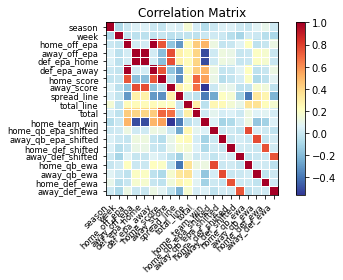

In [124]:
from statsmodels.graphics.correlation import plot_corr

correlation_viz = plot_corr(corr, xnames = corr.columns) 

In [125]:
train, test = train_test_split(ml, test_size=0.2)
lin_reg = LinearRegression()

In [126]:
trained_data = lin_reg.fit(train[['home_qb_ewa','away_qb_ewa']], train[['home_team_win']])

In [127]:
test['pred_home_win'] = trained_data.predict(test[['home_qb_ewa','away_qb_ewa']])

/Users/tcjurgens/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
test

,game_id,season,week,home_team,home_qb_name,home_off_epa,away_team,away_qb_name,away_off_epa,def_epa_home,...,home_team_win,home_qb_epa_shifted,away_qb_epa_shifted,home_def_shifted,away_def_shifted,home_qb_ewa,away_qb_ewa,home_def_ewa,away_def_ewa,pred_home_win
2121,2019_17_PIT_BAL,2019,17,BAL,Robert Griffin,-0.108325,PIT,Devlin Hodges,-0.422164,-0.422164,...,1,-0.059453,-0.176220,-0.154075,-0.206020,-0.095650,-0.116999,-0.091631,-0.171534,0.583639
2370,2020_16_MIN_NO,2020,16,NO,Drew Brees,0.405349,MIN,Kirk Cousins,0.161443,0.161443,...,1,-0.133296,0.159396,0.054446,0.217581,-0.033799,0.107287,-0.045157,0.008578,0.472865
2480,2021_05_NYG_DAL,2021,5,DAL,Dak Prescott,0.176730,NYG,Daniel Jones,-0.129690,-0.129690,...,1,0.258985,0.236693,0.080151,0.126040,0.154782,0.089232,-0.000382,0.054230,0.601433
861,2015_04_OAK_CHI,2015,4,CHI,Jay Cutler,-0.058235,LV,Derek Carr,-0.178809,-0.178809,...,1,-0.215228,0.268562,0.259410,0.066285,-0.088917,-0.114222,0.239214,0.042385,0.585955
1266,2016_14_DEN_TEN,2016,14,TEN,Marcus Mariota,-0.082712,DEN,Trevor Siemian,-0.125312,-0.125312,...,1,0.318678,-0.031619,0.067825,-0.359352,0.152371,-0.049296,0.114274,-0.197906,0.691976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,2020_17_LV_DEN,2020,17,DEN,Drew Lock,-0.003464,LV,Derek Carr,0.066586,0.066586,...,0,-0.132298,0.038872,0.498414,0.099734,-0.079579,-0.081189,0.169132,0.052478,0.569782
1136,2016_05_HOU_MIN,2016,5,MIN,Sam Bradford,0.075990,HOU,Brock Osweiler,-0.299449,-0.299449,...,1,0.022657,-0.245896,-0.199567,-0.120960,-0.061965,-0.115695,-0.176176,-0.159156,0.603594
1260,2016_14_ARI_MIA,2016,14,MIA,Ryan Tannehill,-0.127863,ARI,Carson Palmer,-0.226829,-0.226829,...,1,0.225799,-0.031556,0.130556,0.122501,0.110153,-0.102425,0.051235,-0.016167,0.701175
2024,2019_11_HOU_BAL,2019,11,BAL,Lamar Jackson,0.413722,HOU,Deshaun Watson,-0.407996,-0.407996,...,1,0.189263,0.211321,-0.108386,-0.302708,0.111432,0.157982,-0.003319,-0.059070,0.528961


<AxesSubplot:>

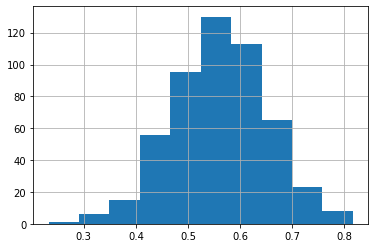

In [129]:
test.pred_home_win.hist()